In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [2]:
df=pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
pandas_profiling.ProfileReport(df)


In [7]:
df.shape


(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

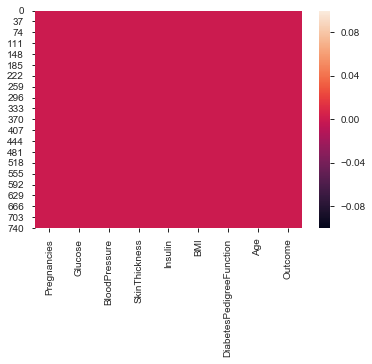

In [9]:
sns.heatmap(df.isnull())

In [10]:
desc=df.describe().transpose()
desc

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
desc['iqr'] = desc['75%'] - desc['25%']
desc['uppwhisk'] = desc['75%'] + (1.5*(desc['iqr']))
desc['lowwhisk'] = desc['25%'] - (1.5*(desc['iqr']))
desc

,count,mean,std,min,25%,50%,75%,max,iqr,uppwhisk,lowwhisk
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,5.0000,13.500,-6.500
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,41.2500,202.125,37.125
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,18.0000,107.000,35.000
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,32.0000,80.000,-48.000
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,127.2500,318.125,-190.875
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,9.3000,50.550,13.350
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,0.3825,1.200,-0.330
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,17.0000,66.500,-1.500
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,1.0000,2.500,-1.500


In [12]:
for col in df.columns:
     df.drop(df[(df[col] < desc.loc[col].lowwhisk) | (df[col] > desc.loc[col].uppwhisk)].index,inplace=True)

In [13]:
df.shape

(639, 9)

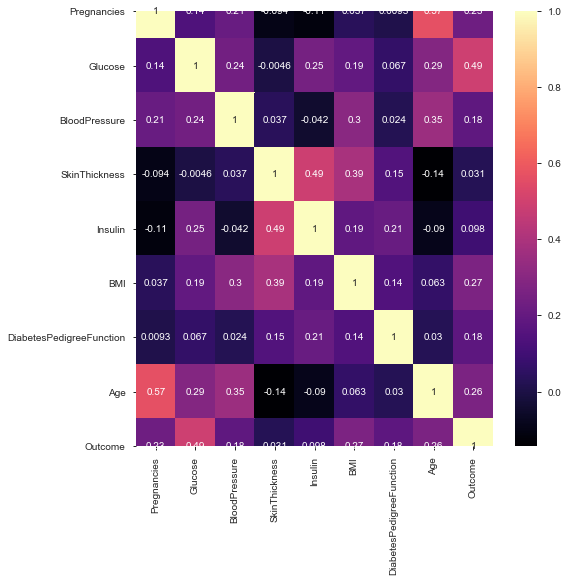

In [14]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap='magma')

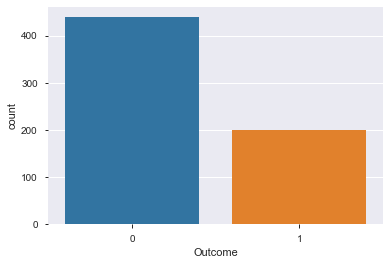

In [15]:
sns.countplot('Outcome',data=df)


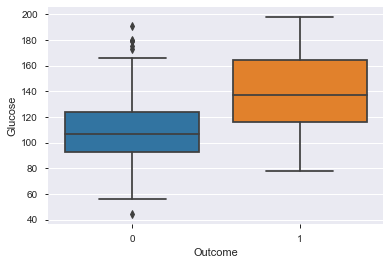

In [16]:
sns.boxplot('Outcome','Glucose',data=df)


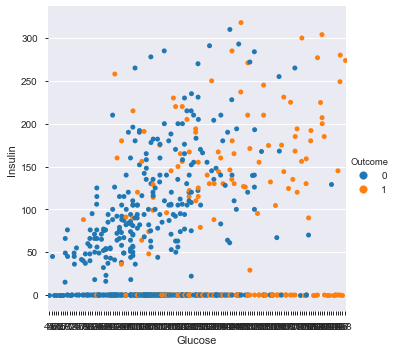

In [17]:
sns.catplot('Glucose','Insulin',data=df,hue='Outcome')


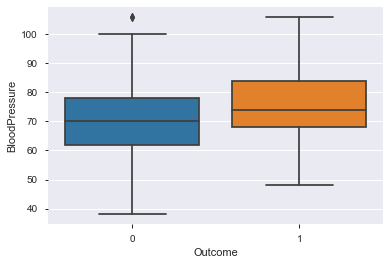

In [18]:
sns.boxplot('Outcome','BloodPressure',data=df)


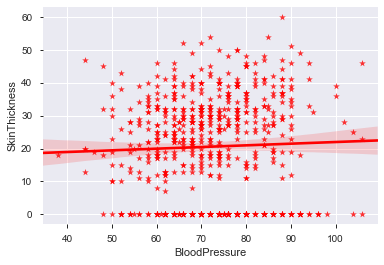

In [19]:
sns.regplot('BloodPressure','SkinThickness',data=df,marker='*',color='red')


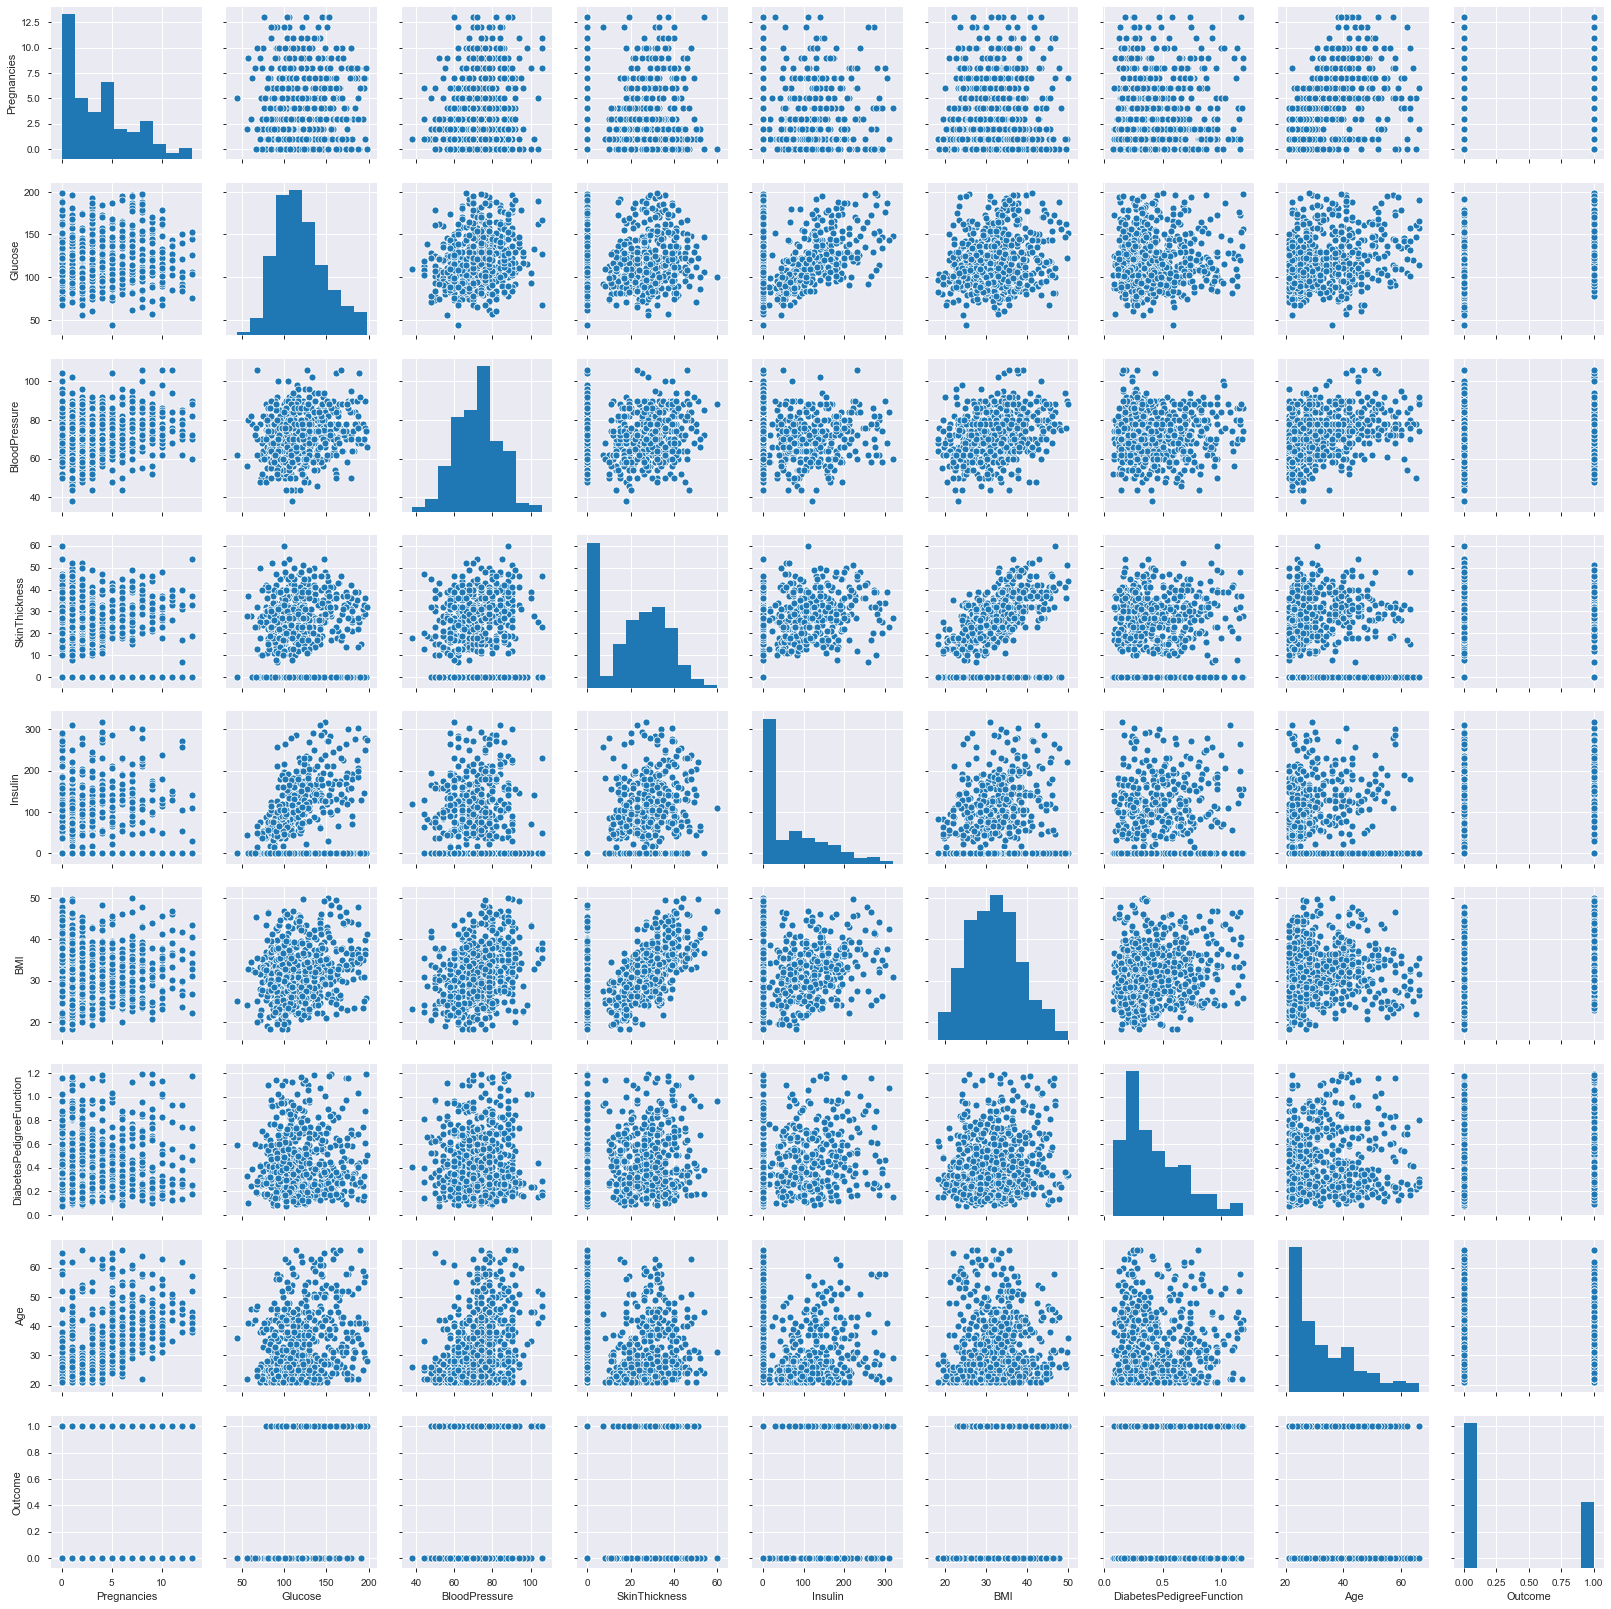

In [20]:
sns.pairplot(df)

In [21]:
df.columns[(df == 0).all()]

Index([], dtype='object')

In [22]:
df['BloodPressure']=df['BloodPressure'].replace(0,np.nan)
df['BMI']=df['BMI'].replace(0,np.nan)
df['Insulin']=df['Insulin'].replace(0,np.nan)
df['SkinThickness']=df['SkinThickness'].replace(0,np.nan)

In [23]:
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               179
Insulin                     307
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
df['BloodPressure'].fillna((df['BloodPressure'].mean()),inplace=True)
df['BMI'].fillna((df['BMI'].mean()),inplace=True)
df['Insulin'].fillna((df['Insulin'].mean()),inplace=True)
df['SkinThickness'].fillna((df['SkinThickness'].mean()),inplace=True)


In [25]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from xgboost import XGBClassifier
rfc= XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.06, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
rfc.fit(X_train,y_train)
y_pred= rfc.predict(X_test)
y_pred_prob=rfc.predict_proba(X_test)

In [29]:
"""from sklearn.model_selection import cross_val_score,GridSearchCV
params = {
     'learning_rate': [0.05,0.06],
     'n_estimators': [1000,1100],
     'max_depth':[7,8],
     'reg_alpha':[0.3,0.4,0.5]
    }
 
# Initializing the XGBoost Regressor
xgb_model = XGBClassifier()
 
# Gridsearch initializaation
gsearch = GridSearchCV(xgb_model, params,
                    verbose=True,
                    cv=10,
                    n_jobs=-1)
gsearch.fit(X,y) 
#Printing the best chosen params
print(gsearch.best_params_)"""

"from sklearn.model_selection import cross_val_score,GridSearchCV\nparams = {\n     'learning_rate': [0.05,0.06],\n     'n_estimators': [1000,1100],\n     'max_depth':[7,8],\n     'reg_alpha':[0.3,0.4,0.5]\n    }\n \n# Initializing the XGBoost Regressor\nxgb_model = XGBClassifier()\n \n# Gridsearch initializaation\ngsearch = GridSearchCV(xgb_model, params,\n                    verbose=True,\n                    cv=10,\n                    n_jobs=-1)\ngsearch.fit(X,y) \n#Printing the best chosen params\nprint(gsearch.best_params_)"

In [30]:
y_pred


array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[69 14]
 [16 29]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        83
           1       0.67      0.64      0.66        45

    accuracy                           0.77       128
   macro avg       0.74      0.74      0.74       128
weighted avg       0.76      0.77      0.76       128

0.765625
